# **Importing Libraries**

In [1]:
import requests   
from bs4 import BeautifulSoup as bs  
import re 
iphone_reviews=[]

# **Extracting reviews from snapdeal website**

In [2]:
iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser") 
  temp = soup.findAll("div",attrs={"class","user-review"})
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  

In [3]:
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

['The piece delivered in good conditions... Received a discount of 1000rs on free charge coupon. Delivered within 2 days before committed delivery.',
 'Bought this for my dear wife as a surprise. Got delivered on time!',
 'Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.',
 'offer product is available, customer care also good',
 'Lacks the feel.',
 'Worth in this price. Excellent features. Overall performance is Good',
 'Service quality is very good and level of interactions have been good.',
 'It&aposs really 100% worth to buy this product. I am fully satisfied with this product.',
 'Good  i phone mobile oparating essy , inter net fast working',
 'Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****',
 'I am very much happy with my product thanks to SNEPDEAL.',
 'it is simple \nall the thing that u need it having it \nI have buy it 2 year before from snapdeal and still it is in perfect condition.\nno lagging

# **Import Libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

# **load the dataset**

In [7]:
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['The piece delivered in good conditions... Received a discount of 1000rs on free charge coupon. Delivered within 2 days before committed delivery.','Bought this for my dear wife as a surprise. Got delivered on time!','Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.','offer product is available,customer care also good','Lacks the feel.','Worth in this price. Excellent features. Overall performance is Good','Service quality is very good and level of interactions have been good.','It&aposs really 100% worth to buy this product. I am fully satisfied with this product.','Good i phone mobile oparating essy,...,'Very good one perfectly the original one with all original accessories','Excellent Product & Good Service by Snap Deal.','Its an awesome phone','Good,product is satisfied which I got from Snapdeal','awesum phone.good price good product.iphone is the best','got delivered on time and satisfactory product as always','I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted','iphone really nice cell','Marvallous Phone...Ever used....You must buy']


# **Text processing**

In [8]:
ip_snapd=' '.join(ip_snapd)
ip_snapd

"['The piece delivered in good conditions... Received a discount of 1000rs on free charge coupon. Delivered within 2 days before committed delivery.'  'Bought this for my dear wife as a surprise. Got delivered on time!'  'Good budgeted iphone. Should only go for it if want to have an iphone experience but within your budget.'  'offer product is available  customer care also good'  'Lacks the feel.'  'Worth in this price. Excellent features. Overall performance is Good'  'Service quality is very good and level of interactions have been good.'  'It&aposs really 100% worth to buy this product. I am fully satisfied with this product.'  'Good  i phone mobile oparating essy   inter net fast working'  'Good Price. Great Seller. Genuine Product. Fast Shipping. Recommended*****'  'I am very much happy with my product thanks to SNEPDEAL.'  'it is simple \\nall the thing that u need it having it \\nI have buy it 2 year before from snapdeal and still it is in perfect condition.\\nno lagging till t

In [9]:
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'The piece delivered in good conditions Received a discount of 1000rs on free charge coupon Delivered within 2 days before committed delivery  Bought this for my dear wife as a surprise Got delivered on time  Good budgeted iphone Should only go for it if want to have an iphone experience but within your budget  offer product is available  customer care also good  Lacks the feel  Worth in this price Excellent features Overall performance is Good  Service quality is very good and level of interactions have been good  Itaposs really 100 worth to buy this product I am fully satisfied with this product  Good  i phone mobile oparating essy   inter net fast working  Good Price Great Seller Genuine Product Fast Shipping Recommended  I am very much happy with my product thanks to SNEPDEAL  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for your business need  Awesome iphone in th

In [10]:
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'The piece delivered in good conditions Received a discount of 1000rs on free charge coupon Delivered within 2 days before committed delivery  Bought this for my dear wife as a surprise Got delivered on time  Good budgeted iphone Should only go for it if want to have an iphone experience but within your budget  offer product is available  customer care also good  Lacks the feel  Worth in this price Excellent features Overall performance is Good  Service quality is very good and level of interactions have been good  Itaposs really 100 worth to buy this product I am fully satisfied with this product  Good  i phone mobile oparating essy   inter net fast working  Good Price Great Seller Genuine Product Fast Shipping Recommended  I am very much happy with my product thanks to SNEPDEAL  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditionnno lagging till todaynsuitable for your business need  Awesome iphone in th

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['The', 'piece', 'delivered', 'in', 'good', 'conditions', 'Received', 'a', 'discount', 'of', '1000rs', 'on', 'free', 'charge', 'coupon', 'Delivered', 'within', '2', 'days', 'before', 'committed', 'delivery', 'Bought', 'this', 'for', 'my', 'dear', 'wife', 'as', 'a', 'surprise', 'Got', 'delivered', 'on', 'time', 'Good', 'budgeted', 'iphone', 'Should', 'only', 'go', 'for', 'it', 'if', 'want', 'to', 'have', 'an', 'iphone', 'experience', 'but', 'within', 'your', 'budget', 'offer', 'product', 'is', 'available', 'customer', 'care', 'also', 'good', 'Lacks', 'the', 'feel', 'Worth', 'in', 'this', 'price', 'Excellent', 'features', 'Overall', 'performance', 'is', 'Good', 'Service', 'quality', 'is', 'very', 'good', 'and', 'level', 'of', 'interactions', 'have', 'been', 'good', 'Itaposs', 'really', '100', 'worth', 'to', 'buy', 'this', 'product', 'I', 'am', 'fully', 'satisfied', 'with', 'this', 'product', 'Good', 'i', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'working', 'Good', '

In [41]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
len(text_tokens)

1573

In [15]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['The', 'piece', 'delivered', 'good', 'conditions', 'Received', 'discount', '1000rs', 'free', 'charge', 'coupon', 'Delivered', 'within', '2', 'days', 'committed', 'delivery', 'Bought', 'dear', 'wife', 'surprise', 'Got', 'delivered', 'time', 'Good', 'budgeted', 'iphone', 'Should', 'go', 'want', 'iphone', 'experience', 'within', 'budget', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'Lacks', 'feel', 'Worth', 'price', 'Excellent', 'features', 'Overall', 'performance', 'Good', 'Service', 'quality', 'good', 'level', 'interactions', 'good', 'Itaposs', 'really', '100', 'worth', 'buy', 'product', 'fully', 'satisfied', 'product', 'Good', 'phone', 'mobile', 'oparating', 'essy', 'inter', 'net', 'fast', 'working', 'Good', 'Price', 'Great', 'Seller', 'Genuine', 'Product', 'Fast', 'Shipping', 'Recommended', 'much', 'happy', 'product', 'thanks', 'SNEPDEAL', 'simple', 'nall', 'thing', 'u', 'need', 'nI', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'laggin

In [16]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'awesome', 'iphone', 'price', 'rangeni', 'would', 'recommend', 'phone', 'good', 'mobile', 'memory', 'filled', 'faster', '8gb', 'limit', 'really', 'happy', 'product', 'servicealways', 'best', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amazing', 'good', 'like', 'iphone', 'apple', 'snapdeal', 'service', 'good', 'good', 'product', 'packing', 'also', 'good', 'issue', 'courier', 'servicethey', 'took', '10', 'days', 'deliver', 'got', 'great', 'discount', 'phone', 'worth', 'wife', 'wanted', 'try', 'iphone', 'loving', 'excellent', 'product', 'can', 'recommended', 'friends', 'family', 'members', 'bought', 'iphone', '5c', 'snapdeal', 'product', 'absolutly', 'real', 'wors', 'properly', 'price', 'also', 'low', 'online', 'shoping', 'sides', 'thnxx', 'snapdeal', 'adorable', 'phone', 'top', 'class', 'service', 'ð\x9f\x98\x98', 'pros', 'picture', 'quality', 'awesome', 'sound', 'hearing', 'ad']


In [17]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['conditionnno', 'lag', 'till', 'todaynsuit', 'busi', 'need', 'awesom', 'iphon', 'price', 'rangeni', 'would', 'recommend', 'phone', 'good', 'mobil', 'memori', 'fill', 'faster', '8gb', 'limit', 'realli', 'happi', 'product', 'servicealway', 'best', 'great', 'product', 'amaz', 'price', 'deliveri', 'fast', 'n', 'iphon', 'amaz', 'good', 'like', 'iphon', 'appl', 'snapdeal', 'servic', 'good', 'good', 'product', 'pack', 'also', 'good', 'issu', 'courier', 'servicethey', 'took', '10', 'day', 'deliv', 'got', 'great', 'discount', 'phone', 'worth', 'wife', 'want', 'tri', 'iphon', 'love', 'excel', 'product', 'can', 'recommend', 'friend', 'famili', 'member', 'bought', 'iphon', '5c', 'snapdeal', 'product', 'absolutli', 'real', 'wor', 'properli', 'price', 'also', 'low', 'onlin', 'shope', 'side', 'thnxx', 'snapdeal', 'ador', 'phone', 'top', 'class', 'servic', 'ð\x9f\x98\x98', 'pro', 'pictur', 'qualiti', 'awesom', 'sound', 'hear', 'ad']


In [18]:
!pip3 install en_core_web_sm
!python -m spacy download %

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

✘ No compatible package found for '%' (spaCy v3.3.1)



In [19]:
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

the piece delivered good conditions received discount 1000rs free charge coupon delivered within 2 days committed delivery bought dear wife surprise got delivered time good budgeted iphone should go want iphone experience within budget offer product available customer care also good lacks feel worth price excellent features overall performance good service quality good level interactions good itaposs really 100 worth buy product fully satisfied product good phone mobile oparating essy inter net fast working good price great seller genuine product fast shipping recommended much happy product thanks snepdeal simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need awesome iphone price rangeni would recommend phone good mobile memory filled faster 8gb limit really happy product servicealways best great product amazing price delivery fast n iphone amazing good like iphone apple snapdeal service good good product packing also good 

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['the', 'piece', 'deliver', 'good', 'condition', 'receive', 'discount', '1000rs', 'free', 'charge', 'coupon', 'deliver', 'within', '2', 'day', 'commit', 'delivery', 'buy', 'dear', 'wife', 'surprise', 'got', 'deliver', 'time', 'good', 'budget', 'iphone', 'should', 'go', 'want', 'iphone', 'experience', 'within', 'budget', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'lack', 'feel', 'worth', 'price', 'excellent', 'feature', 'overall', 'performance', 'good', 'service', 'quality', 'good', 'level', 'interaction', 'good', 'itaposs', 'really', '100', 'worth', 'buy', 'product', 'fully', 'satisfied', 'product', 'good', 'phone', 'mobile', 'oparate', 'essy', 'inter', 'net', 'fast', 'work', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommend', 'much', 'happy', 'product', 'thank', 'snepdeal', 'simple', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable'

In [21]:
clean_comments=' '.join(lemmas)
clean_comments

'the piece deliver good condition receive discount 1000rs free charge coupon deliver within 2 day commit delivery buy dear wife surprise got deliver time good budget iphone should go want iphone experience within budget offer product available customer care also good lack feel worth price excellent feature overall performance good service quality good level interaction good itaposs really 100 worth buy product fully satisfied product good phone mobile oparate essy inter net fast work good price great seller genuine product fast shipping recommend much happy product thank snepdeal simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need awesome iphone price rangeni would recommend phone good mobile memory fill fast 8 gb limit really happy product servicealway good great product amazing price delivery fast n iphone amazing good like iphone apple snapdeal service good good product pack also good issue courier servicethey take 10 

# **Feature Extaction**

# **1. Using CountVectorizer**

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [23]:
print(cv.vocabulary_)

{'the': 362, 'piece': 255, 'deliver': 97, 'good': 146, 'condition': 75, 'receive': 291, 'discount': 102, '1000rs': 2, 'free': 138, 'charge': 63, 'coupon': 81, 'within': 405, 'day': 91, 'commit': 71, 'delivery': 98, 'buy': 55, 'dear': 94, 'wife': 403, 'surprise': 354, 'got': 149, 'time': 373, 'budget': 51, 'iphone': 177, 'should': 325, 'go': 145, 'want': 397, 'experience': 124, 'offer': 231, 'product': 269, 'available': 33, 'customer': 87, 'care': 60, 'also': 21, 'lack': 187, 'feel': 129, 'worth': 411, 'price': 262, 'excellent': 122, 'feature': 128, 'overall': 240, 'performance': 249, 'service': 315, 'quality': 282, 'level': 192, 'interaction': 172, 'itaposs': 182, 'really': 290, '100': 1, 'fully': 140, 'satisfied': 305, 'phone': 250, 'mobile': 211, 'oparate': 235, 'essy': 117, 'inter': 171, 'net': 223, 'fast': 127, 'work': 409, 'great': 151, 'seller': 314, 'genuine': 142, 'shipping': 321, 'recommend': 295, 'much': 215, 'happy': 155, 'thank': 359, 'snepdeal': 340, 'simple': 328, 'nall':

In [24]:
print(cv.get_feature_names()[100:200])

['dere', 'dis', 'discount', 'dispatchnprosn1', 'display', 'do', 'donapost', 'doubt', 'doubted', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'gift', 'go', 'good', 'goodbut', 'goood', 'got', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heated', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'iaposm', 'in', 'initially', 'inter', 'interaction', 'interest', 'io', 'ios', 'ios9', 'iphone', 'iphone5c', 'iphoneearli', 'issue', 'it', 'itaposs', 'item', 'itnniphone', 'its', 'job', 'lack', 'lag', 'lagging', 'late', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(clean_commentscv.toarray().shape)

(1025, 417)


# **2. CountVectorizer with N-grams (Bigrams & Trigrams)**

In [27]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [28]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'amazing', 'and', 'apple', 'available', 'awesome', 'battery', 'be', 'body', 'budget', 'but', 'buy', 'camera', 'cheap', 'condition', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'everyone', 'excellent', 'experience', 'fast', 'feature', 'feel', 'file', 'fill', 'gb', 'genuine', 'get', 'go', 'good', 'got', 'great', 'hang', 'happy', 'have', 'io', 'iphone', 'issue', 'it', 'itaposs', 'late', 'like', 'look', 'low', 'memory', 'mobile', 'need', 'new', 'nice', 'not', 'offer', 'one', 'order', 'original', 'pack', 'perfect', 'perfectly', 'perform', 'phone', 'plastic', 'price', 'problem', 'product', 'quality', 'really', 'receive', 'recommend', 'satisfied', 'seller', 'service', 'shipping', 'site', 'snap', 'snapdeal', 'so', 'space', 'superb', 'take', 'thank', 'the', 'thing', 'this', 'though', 'till', 'time', 'update', 'use', 'very', 'want', 'well', 'within', 'work', 'worth', 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ..

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **3. TF-IDF Vectorizer**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [30]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '1000rs', '2030', '20k', '24', '2nd', '5c', '5cnnsnapdeal', '6s', '9nncons', 'absolutly', 'accessory', 'account', 'action', 'ad', 'adorable', 'affordable', 'after', 'almost', 'already', 'also', 'always', 'amazing', 'and', 'andriodblackberrywindow', 'android', 'apospriorityapos', 'app', 'apple', 'around', 'as', 'attractive', 'available', 'awesome', 'awesum', 'awsme', 'awwsum', 'back', 'battery', 'be', 'beatifully', 'beautiful', 'believe', 'bit', 'bluetooth', 'body', 'bodyn2', 'box', 'brand', 'bt', 'budget', 'build', 'business', 'but', 'buy', 'camera', 'can', 'canapost', 'capacity', 'care', 'category', 'cell', 'charge', 'cheap', 'choice', 'choose', 'class', 'close', 'colour', 'come', 'commit', 'compare', 'competitive', 'con', 'condition', 'conditionnno', 'consist', 'contact', 'cool', 'costly', 'coupon', 'courier', 'cr', 'crazy', 'credit', 'crisp', 'customer', 'damage', 'dat', 'data', 'day', 'daynand', 'deal', 'dear', 'decide', 'defination', 'deliver', 'delivery', 'delivry',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Generate Word Cloud**

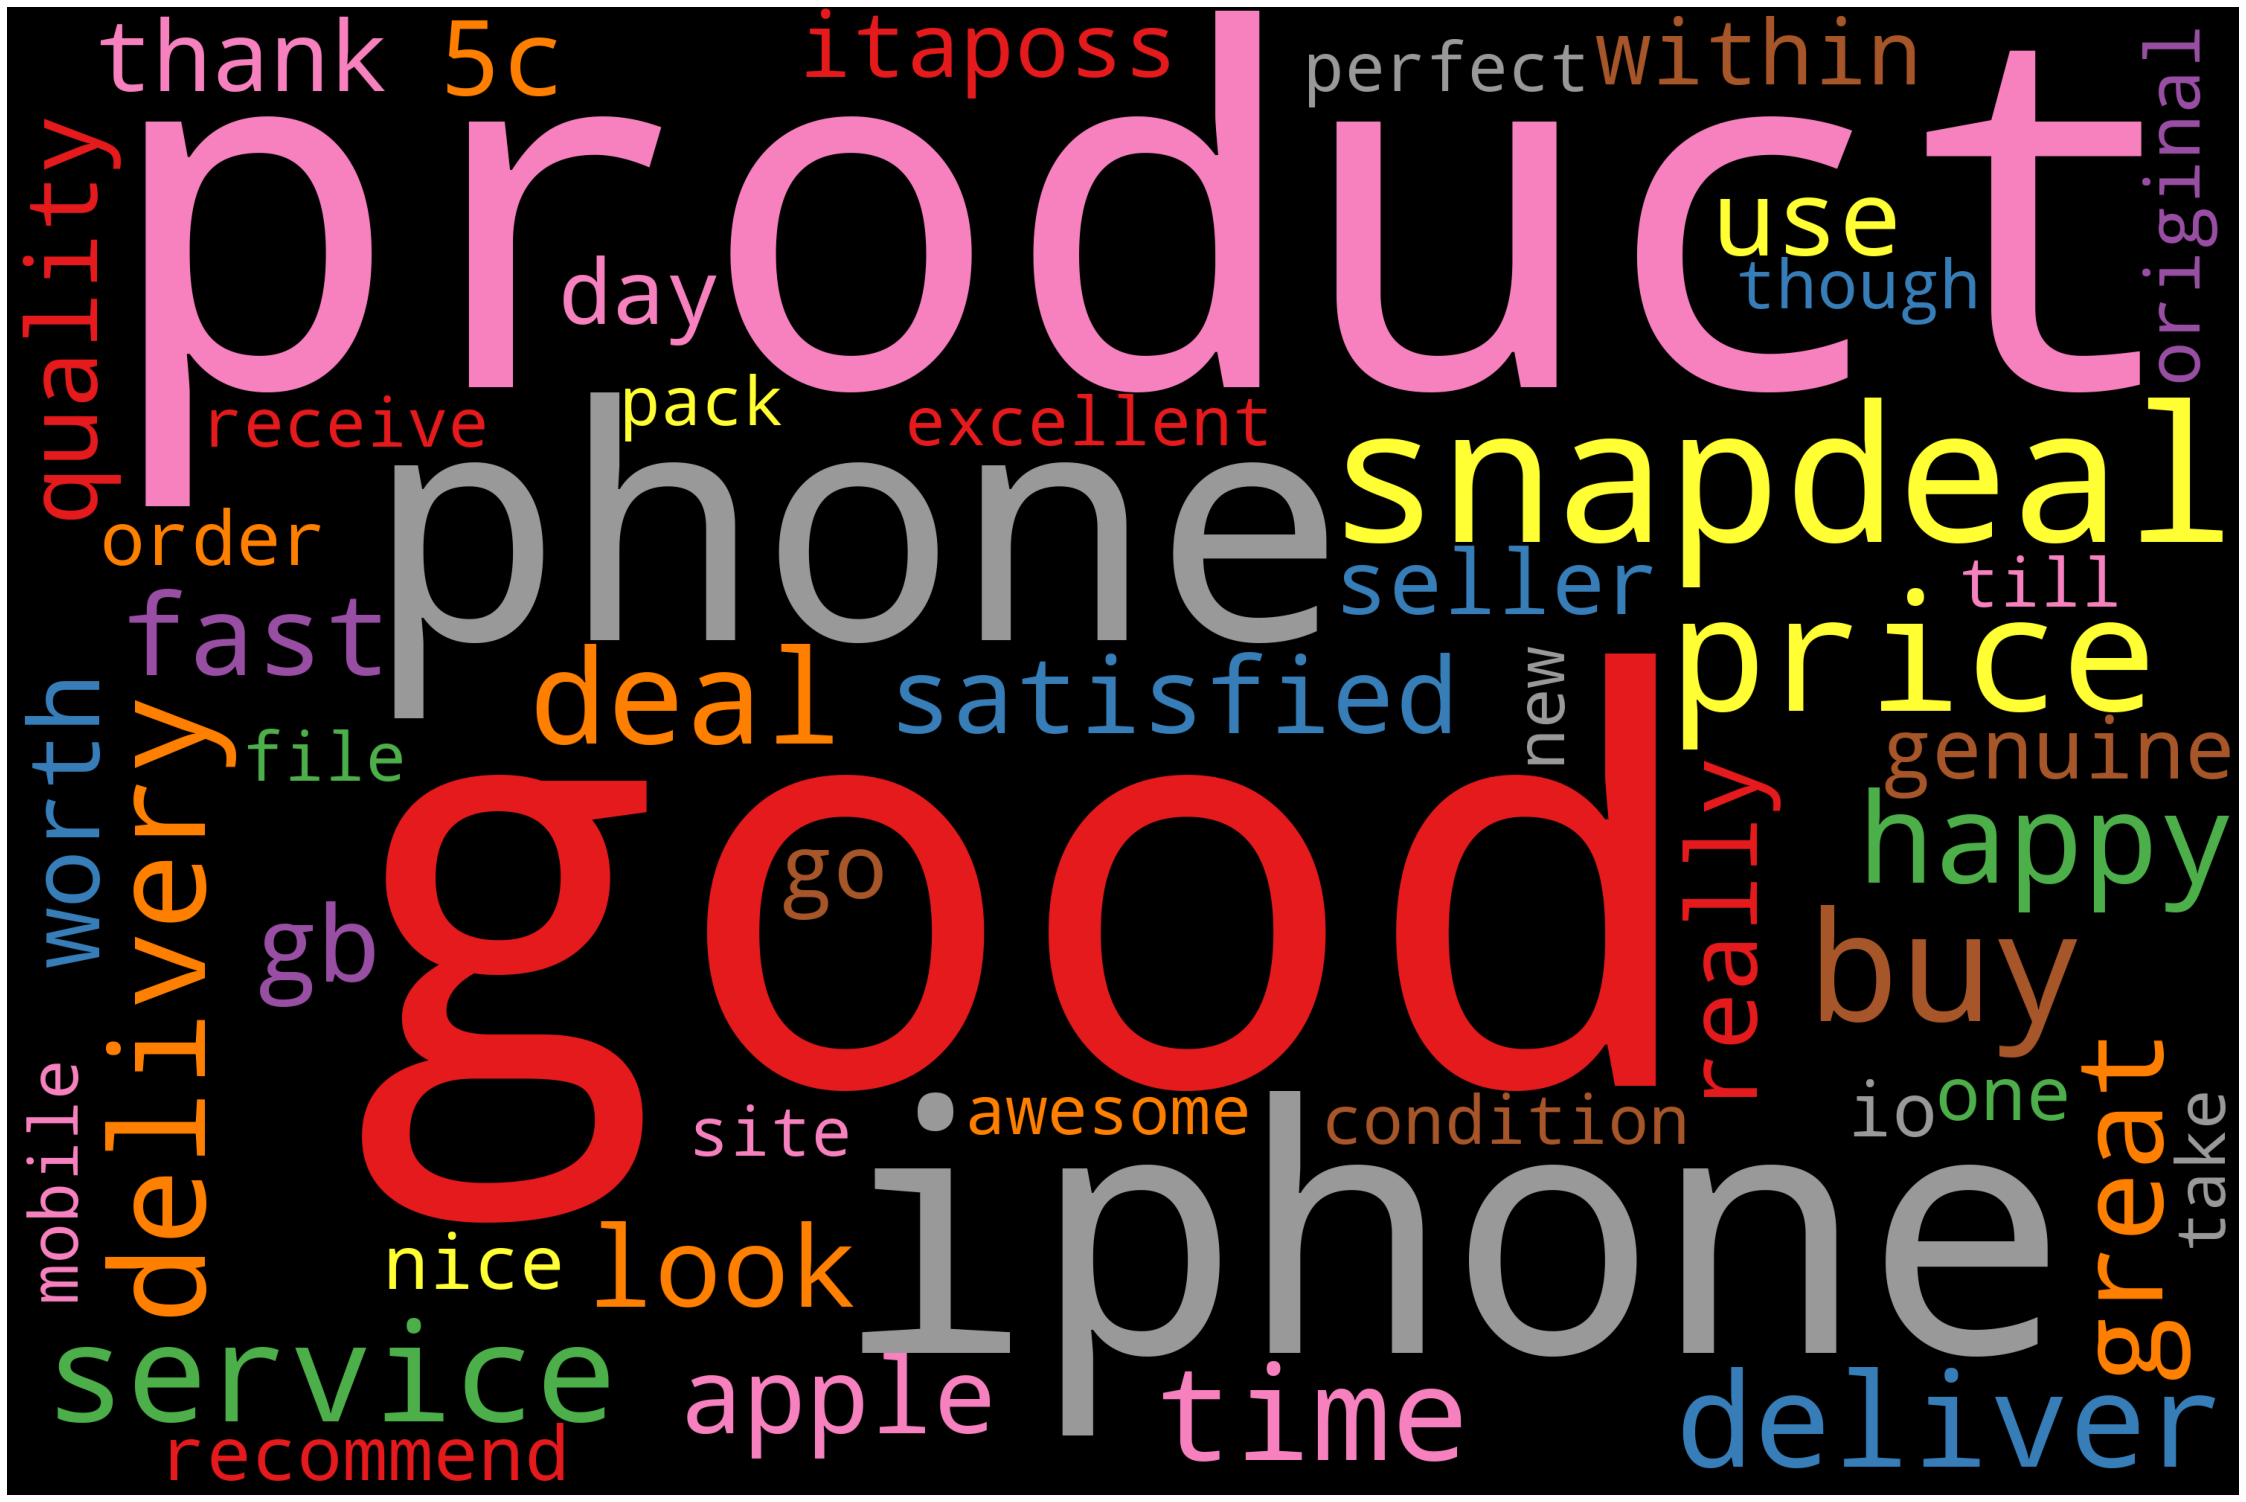

In [31]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

# **Named Entity Recognition (NER)**

In [32]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_comments
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [33]:
for token in doc_block[100:200]:
    print(token,token.pos_)

conditionnno NOUN
lagging NOUN
till SCONJ
todaynsuitable ADJ
business NOUN
need VERB
awesome ADJ
iphone NOUN
price NOUN
rangeni NOUN
would AUX
recommend VERB
phone NOUN
good ADJ
mobile ADJ
memory NOUN
fill VERB
fast ADJ
8 NUM
gb NOUN
limit NOUN
really ADV
happy ADJ
product NOUN
servicealway VERB
good ADJ
great ADJ
product NOUN
amazing ADJ
price NOUN
delivery NOUN
fast ADV
n CCONJ
iphone NOUN
amazing ADJ
good ADJ
like ADP
iphone NOUN
apple NOUN
snapdeal ADV
service NOUN
good ADJ
good ADJ
product NOUN
pack NOUN
also ADV
good ADJ
issue NOUN
courier NOUN
servicethey PRON
take VERB
10 NUM
day NOUN
deliver AUX
get VERB
great ADJ
discount NOUN
phone NOUN
worth ADJ
wife NOUN
want VERB
try VERB
iphone NOUN
love NOUN
excellent ADJ
product NOUN
can AUX
recommend VERB
friend NOUN
family NOUN
member NOUN
buy VERB
iphone NOUN
5c NUM
snapdeal ADJ
product NOUN
absolutly ADV
real ADJ
wor NOUN
properly ADV
price NOUN
also ADV
low ADJ
online ADJ
shop NOUN
side NOUN
thnxx ADJ
snapdeal ADV
adorable ADJ
pho

In [34]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['wor', 'price', 'shop', 'side', 'phone', 'class', 'service', 'picture', 'quality', 'sound', 'hear', 'ad', 'look', 'feel', 'ncon', 'transfer', 'file', 'use', 'andriodblackberrywindow', 'iphone', 'use', 'file', 'transfer', 'iphone', 'time', 'delivery', 'star', 'product', 'awwsum', 'use', 'look', 'defination', 'prefer', 'nxt', 'time', 'working', 'smooth', 'apple', 'iphone', 'cool', 'buy', 'price', 'sale', 'product', 'deliver', 'time', 'commit', 'value', 'money', 'quality', 'product', 'delivery', 'time', 'order', 'sisteraposs', 'gift', 'week', 'come', 'thatnand', 'thank', 'get', 'offer', 'recharge', 'sitenngreat', 'job', 'team', 'phone', 'product', 'quality', 'thing', 'memory', 'capacity', 'store', 'data', 'dream', 'come', 'deal', 'shipping', 'service', 'deliver', 'seal', 'box', 'brand', 'deal', 'buy', 'deal', 'price', 'servicenthank', 'sd', 'phone', 'price', 'phone', 'price', 'category', 'manufacturer', 'warranty', 'iphone', 'buy', 'use', 'year']


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] 

,word,count
0,product,40
1,iphone,27
2,phone,27
3,price,17
4,buy,15
5,service,12
6,delivery,11
7,time,11
8,deal,11
9,deliver,10


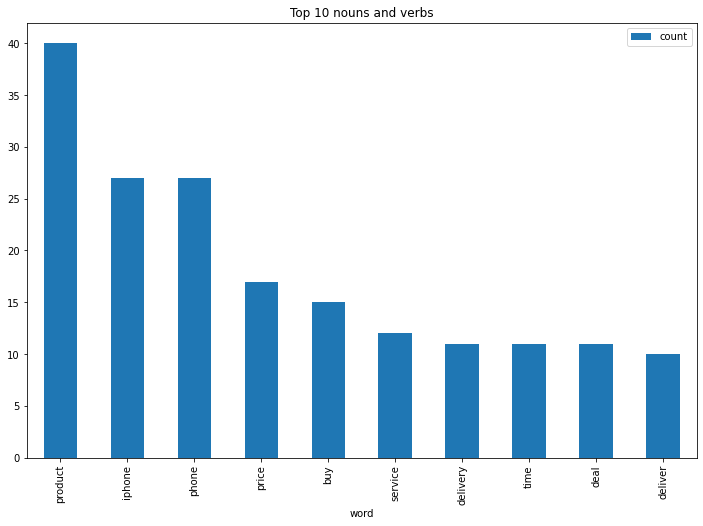

In [36]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [43]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Apple is looking at buying U.K. startup for $1...
1,Autonomous cars shift insurance liability towa...
2,San Francisco considers banning sidewalk deliv...
3,London is a big city in the United Kingdom.
4,Where are you?
5,Who is the president of France?
6,What is the capital of the United States?
7,When was Barack Obama born?
